In [1]:
import numpy as np
from numpy import expand_dims
from keras.models import load_model
from PIL import Image
import cv2
import matplotlib.pyplot as plt

In [2]:
model = load_model('../input/biomed-project/biomed_93.1.h5')
#model.summary()

In [3]:

def decode_image(target_image):

    imgloc=target_image
    img=Image.open(imgloc).resize((150,150))
    image=img
    img=(np.array(img,dtype=np.float32))/255.0

    img = expand_dims(img, 0)
    img = expand_dims(img, -1)
    
    net_out = model.predict_classes(img)
    prb=model.predict_proba(img)
    x_score=5*(1-prb[0]) 
    
    plt.imshow(image)
    
    return net_out,x_score


In [4]:
def decode_profile(xray_image,symptoms,saturation):
    
    netout,x_score=decode_image(xray_image)

    print('xray score        : ',round(x_score[0],3))
    
    if saturation<90:
        s_score=3
    else:
        s_score=(100-saturation)/3.33

    print('Saturation Score  : ',round(s_score,3)) 
    
    symp=np.count_nonzero(symptoms)
    symp_score=(symp/8)*2
    print('Symptom score     : ',round(symp_score,3))
    
    print('-----------------------------------')
    total_score=x_score+s_score+symp_score
    print('total_score       : ',round(total_score[0],3))
    print('-----------------------------------')
    if total_score>=7:
        print('severe pneumonia')
    elif (total_score>=5) & (total_score<7):
        print('Moderate pneumonia')
    elif (total_score>=3) & (total_score<5):
        print('Mild pneumonia')    
    else:
        print('Normal')
    

xray score        :  5.0
Saturation Score  :  2.402
Symptom score     :  1.25
-----------------------------------
total_score       :  8.652
-----------------------------------
severe pneumonia


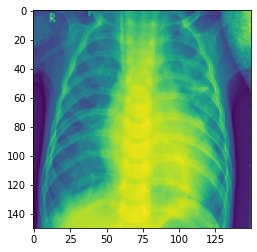

In [5]:
xray_image='../input/biomed-project/modeldata/modeldata/BACTERIA-1351146-0005.jpeg'
#xray_image='../input/biomed-project/modeldata/NORMAL-1049278-0001.jpeg'


saturation  = 92

chest_pain          = 1
cough               = 0
fatigue             = 0
nausea              = 1
fever               = 1
vomiting            = 1
diarrhea            = 0
shortness_of_breath = 1


symptoms=[chest_pain,cough,fatigue,nausea,fever,vomiting,diarrhea,shortness_of_breath]
decode_profile(xray_image,symptoms,saturation)


xray score        :  0.381
Saturation Score  :  0.601
Symptom score     :  0.5
-----------------------------------
total_score       :  1.482
-----------------------------------
Normal


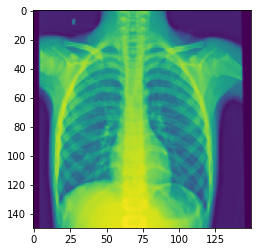

In [6]:
xray_image='../input/biomed-project/modeldata/modeldata/NORMAL-1049278-0001.jpeg'


saturation  = 98

chest_pain          = 0
cough               = 0
fatigue             = 0
nausea              = 1
fever               = 1
vomiting            = 0
diarrhea            = 0
shortness_of_breath = 0


symptoms=[chest_pain,cough,fatigue,nausea,fever,vomiting,diarrhea,shortness_of_breath]
decode_profile(xray_image,symptoms,saturation)
